# From Statistical Physics to Data-Driven Modelling
     with Applications to Quantitative Biology
Tutorial 2: Entropy and information in neural spike trains. 

This tutorial is based on the works: 

-R. R. de Ruyter van Steveninck, G. D. Lewen, S. P. Strong, R. Koberle, W. Bialek Reproducibility and Variability in Neural Spike Trains, Science 275, 1805-1808 (1997)

-K. Koch, J. McLean, M. Berry, P. Sterling, V. Balasubramanian, M. A. Efficiency of Information Transmission by Retinal Ganglion Cells Current Biology, 14, 15231530, (2004).

Starting Notebook SC RM FZ. 

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.sparse import coo_matrix
import numpy.matlib
#matplotlib inline
#plt.rcParams["font.family"] = "serif"
#plt.rcParams["mathtext.fontset"] = "dejavuserif"
#plt.rcParams["figure.figsize"] = (10, 8)
#plt.rcParams["font.size"] = 26

In [5]:
#import data
data=np.loadtxt('./Data/dati2-berry.dat')

#parameters
#time bin =10 ms
dt=0.01
#length (in seconds) of a word
ls=0.1
#length (in bits) of a word
l=int(ls/dt)
#length (in seconds) of a repetition
T=26.5
#number of bins for each repetition of duration 26.5 s
M=int(T/dt)
#number of repetition of the input
Nr=120
#number of repetitions used in the data analysis
#verify for Nrp=1, the noise entropy should be zero
Nrp=120
#Number of words
Nwt=np.power(2,l)


#Find lines in the data delimiting neurons spike trains + add last line
Ndata=np.size(data);
Ncells=40;
tc=(np.zeros(Ncells+1)).astype(int)
tc[0:Ncells]=np.where(data == 4000)[0][:]
tc[Ncells]=Ndata

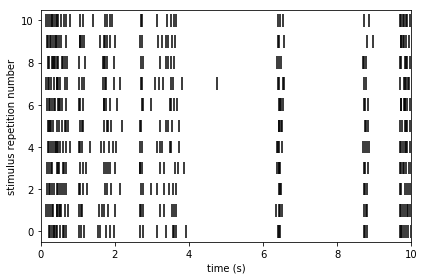

In [6]:
#Question 0: Raster Plot
data0=data[tc[0]+2:tc[1]]
x=data0%T
y=data0//T
plt.xlim([0,10])
plt.ylim([-0.5,10.5])
plt.vlines(x,y-0.3,y+0.3)
plt.xlabel('time (s)')
plt.ylabel('stimulus repetition number')
#plt.title('Raster plot for cell 1 (only 10 repetitions and 10 sec are shown)')
plt.tight_layout()
plt.savefig('raster_dt001cell1.pdf')
plt.show()


In [7]:
#Function that converts the spikes for a single neuron into a matrix
#The matrix contains the number of spikes in a bin of size dt for each repetition (line)
def data_to_table (i):
    datai=data[tc[i]+2:tc[i+1]]
    # build the spiking matrix for the neuron i, using sparse matrix
    tt=datai%T
    #time bin of the spike (0:M-1)
    y=np.floor(tt/dt)
    #interval number (0:119)
    x=np.floor(datai//T)
    # conversion to a sparse matrix 
    z=np.ones(np.size(datai))
    s=coo_matrix((z,(x,y)),dtype=np.int8,shape=(Nr,M))
    sreal=s.toarray()
    return sreal

#Function that performs the conversion from a string of bits to an integer
#note that some elements of word can be >1; the first line makes the conversion to 0,1
def toint (word):
    y=(word[:]>0).astype(int)
    bw=[str(t) for t in y]
    bw2=''.join(bw)
    return int(bw2,2)  



Question 1: Entropy as a function of dt of a Poisson process of frequency f=4 Hz.

Question 2: Calculation of the total entropy Stotal,the noise entropy Snoise, the information about the stimuli I and frequency for each neuron.
Plot of Snoise, Stotal and I for the 40 neurons.

Question 3: Compute I as a function of  the number of repetitions of the stimulus and of the duration of the word for the first neuron.


Question 4 (Bonus): Plot the entropy as a function of the time (bin number) and compare with the frequency.  